In [1]:
from utils import *
from CaptureUtils import *

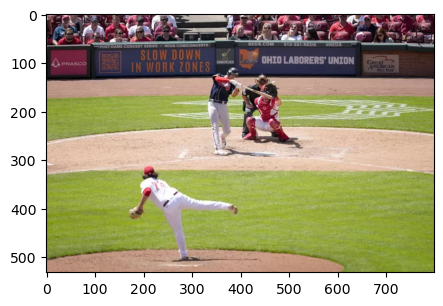

In [2]:
img = readImage('./input/base.png')
showImage(img)

In [3]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)


In [4]:
ca = CaptureUtils(img, 1, color=(0, 255, 255))
pos = ca.startCapture()
pos

[((142, 302), (408, 524)), ((300, 83), (408, 310))]

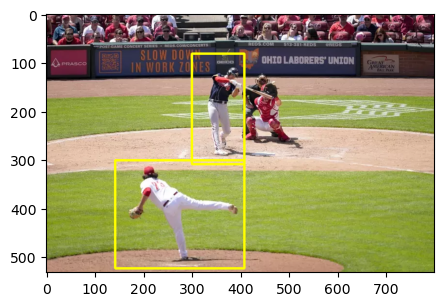

In [5]:
img_tmp = img.copy()
for po in pos:
    cv.rectangle(img_tmp, po[0], po[1], (255, 255, 0), 3)
showImage(img_tmp)

In [9]:
rects = xyxy2xywh(np.array(pos, dtype=np.float32).reshape(-1,4))
rects = rects.astype(np.int32).tolist()
rects

[[142, 302, 266, 222], [300, 83, 108, 227]]

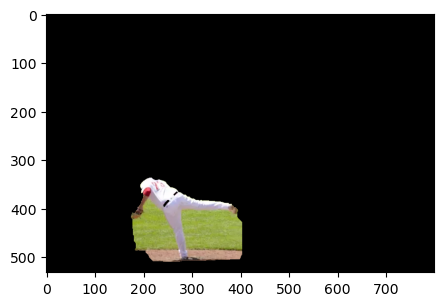

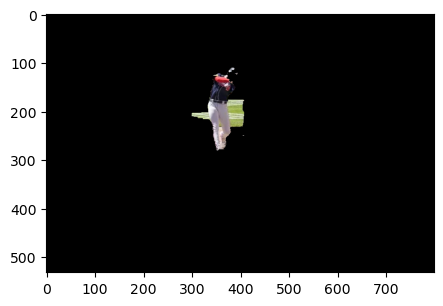

In [12]:
for rect in rects:
    img_tmp = img.copy()
    cv.grabCut(img_tmp,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)
    img_tmp = img_tmp * mask2[:, :, np.newaxis]
    showImage(img_tmp)